# CPU Scheduling

In [172]:
# pip install pandas numpy matplotlib

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Multilevel Queue Scheduler (MLQ)

In [174]:
algo1 = "mlq"

In [175]:
df_mlq_metrics = pd.read_csv(f"{algo1}_metrics.csv")
df_mlq_timeline = pd.read_csv(f"{algo1}_timeline.csv")

In [176]:
display(df_mlq_timeline.head())

,Time,Process
0,0,P7
1,1,P7
2,2,P7
3,3,P7
4,4,P7


In [177]:
display(df_mlq_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,45,43,5,3240,4297,4209,4252,3195
1,P2,294,25,1,434,859,540,565,140
2,P3,267,26,5,4143,4169,3876,3902,3876
3,P4,294,90,3,1674,2962,2578,2668,1380
4,P5,164,38,3,1482,2329,2127,2165,1318


In [178]:
metrics_mlq = df_mlq_metrics.columns[-3:]  
averages_mlq = df_mlq_metrics[metrics_mlq].mean()
print("Average Metrics for MLQ:")
print(averages_mlq)

Average Metrics for MLQ:
Waiting Time       2636.02
Turnaround Time    2685.77
Response Time      1886.98
dtype: float64


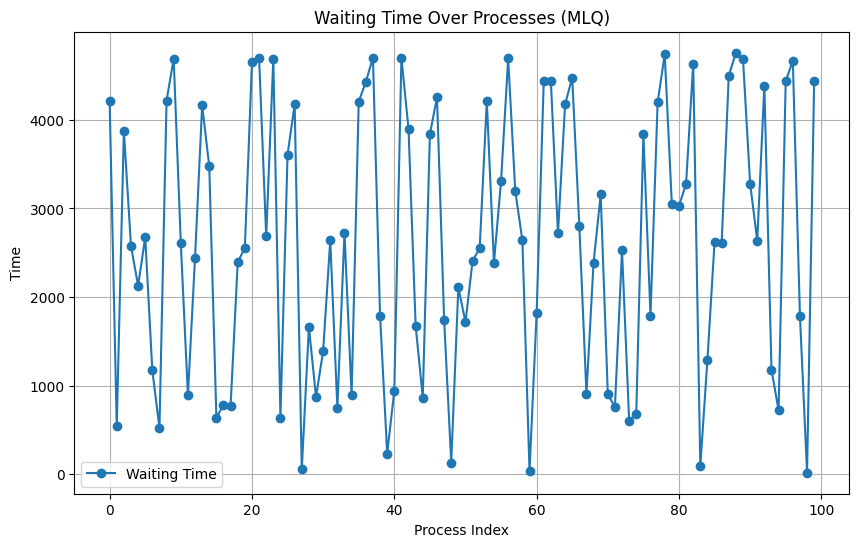

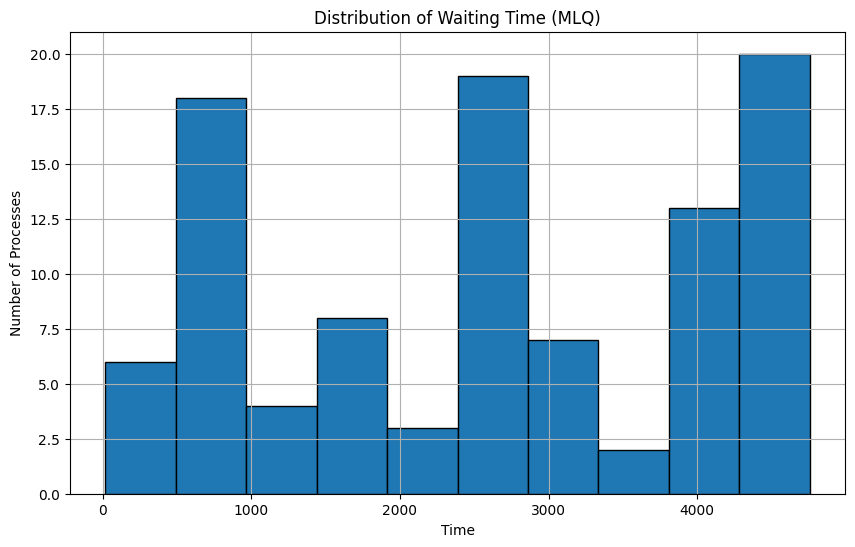

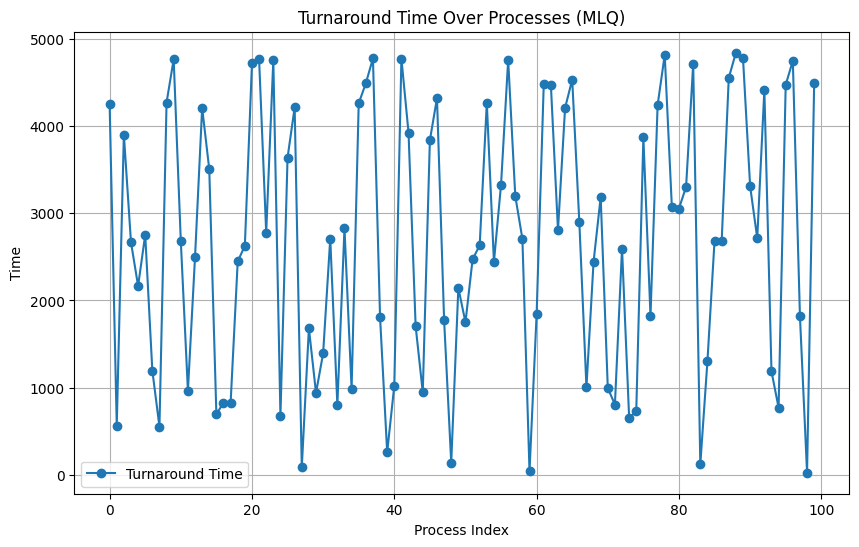

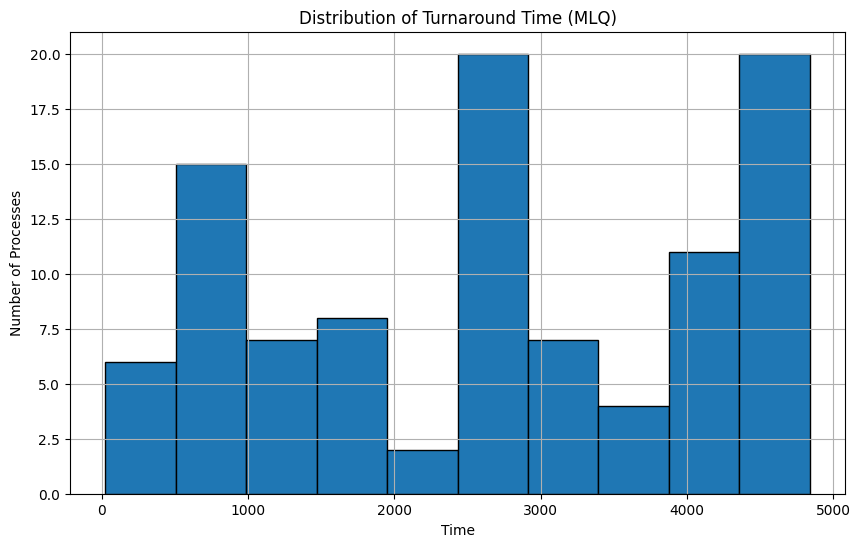

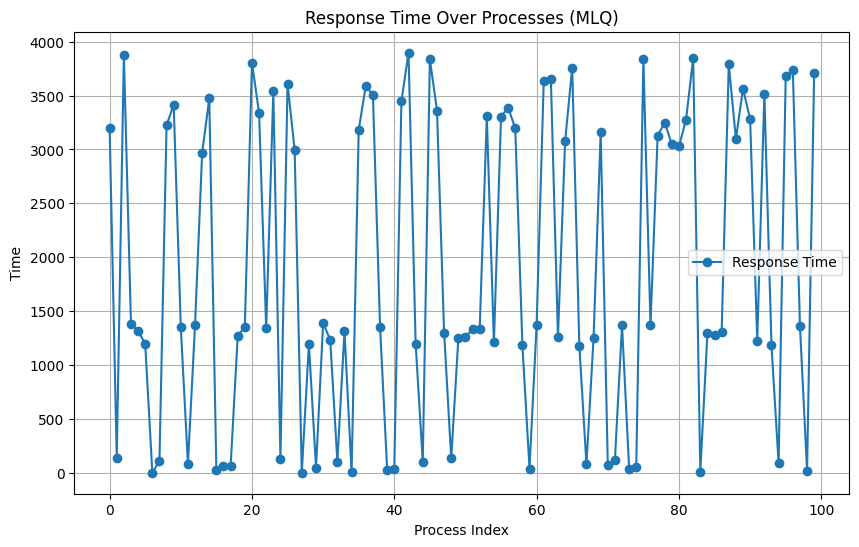

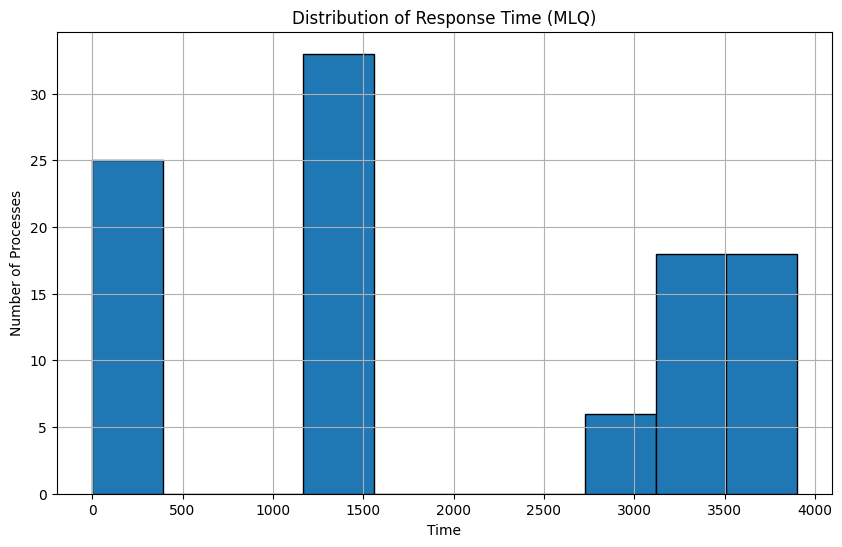

In [179]:
for idx in range(len(metrics_mlq)):
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlq_metrics[metrics_mlq[idx]], marker='o', label=metrics_mlq[idx])
    plt.title(f'{metrics_mlq[idx]} Over Processes (MLQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()

    times = df_mlq_metrics[metrics_mlq[idx]]
    plt.figure(figsize=(10, 6))
    plt.hist(times, bins=10, edgecolor='black')
    plt.title(f'Distribution of {metrics_mlq[idx]} (MLQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.grid()
    plt.show()

## Multilevel Feedback Queue Scheduler (MLFQ)

In [180]:
algo2 = "mlfq"

In [181]:
df_mlfq_metrics = pd.read_csv(f"{algo2}_metrics.csv")
df_mlfq_timeline = pd.read_csv(f"{algo2}_timeline.csv")

In [182]:
display(df_mlfq_timeline.head())

,Time,Process
0,0,P7
1,1,P7
2,2,P7
3,3,P7
4,4,P7


In [183]:
display(df_mlfq_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,45,43,5,480,3635,3547,3590,435
1,P2,294,25,1,672,2732,2413,2438,378
2,P3,267,26,5,1100,3083,2790,2816,833
3,P4,294,90,3,936,4968,4584,4674,642
4,P5,164,38,3,544,3216,3014,3052,380


In [184]:
metrics_mlfq = df_mlfq_metrics.columns[-3:]
averages_mlfq = df_mlfq_metrics[metrics_mlfq].mean()
print("Average Metrics for MLFQ:")
print(averages_mlfq)

Average Metrics for MLFQ:
Waiting Time       3288.20
Turnaround Time    3337.95
Response Time       384.77
dtype: float64


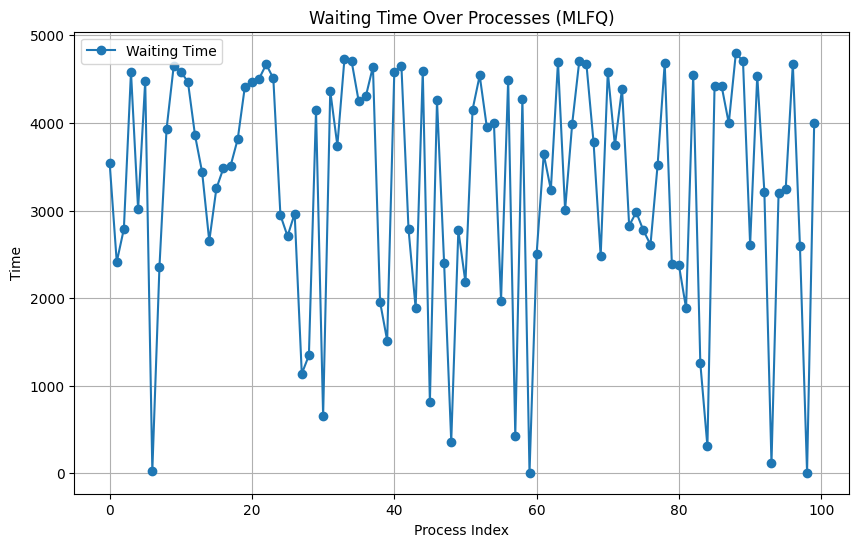

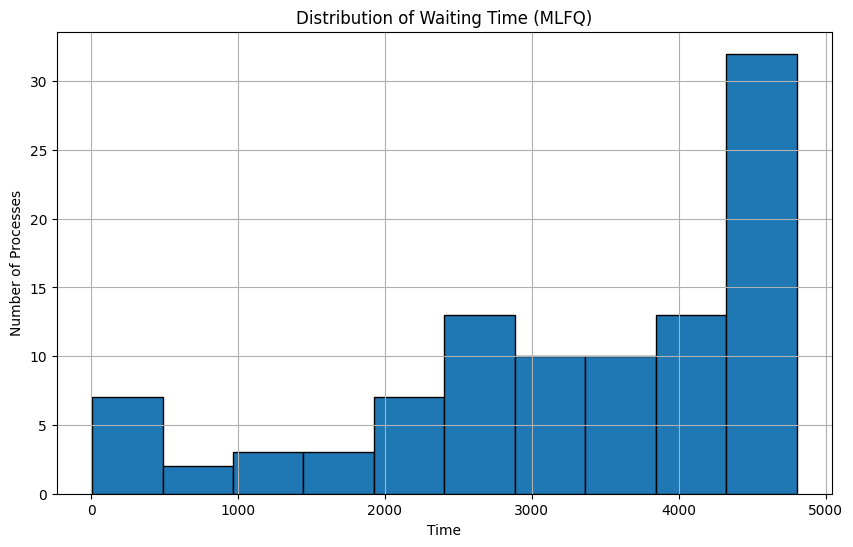

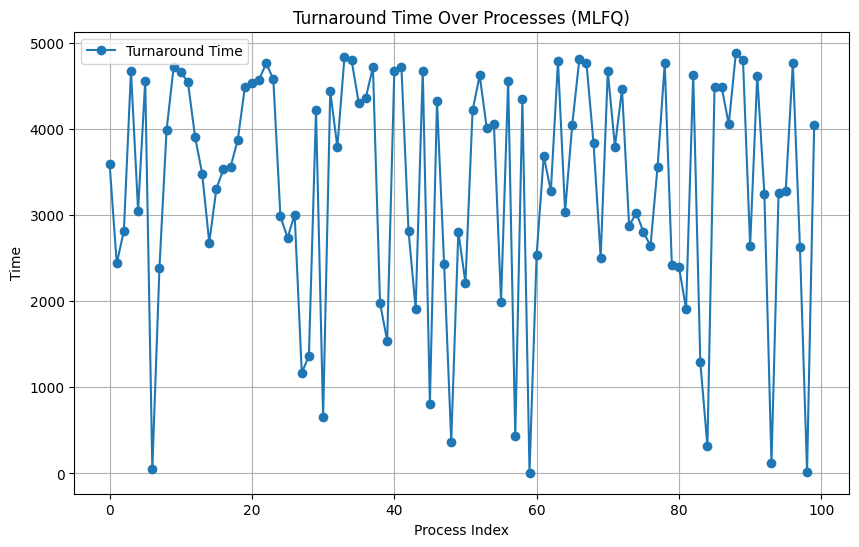

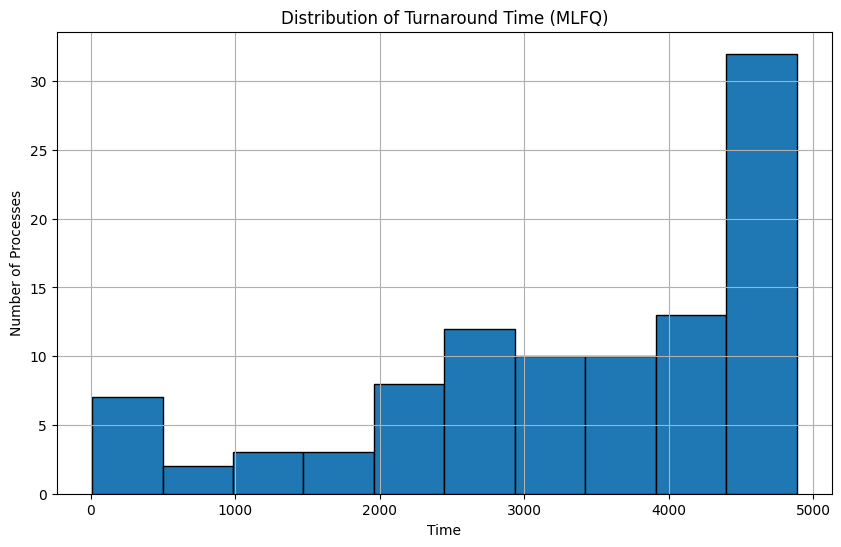

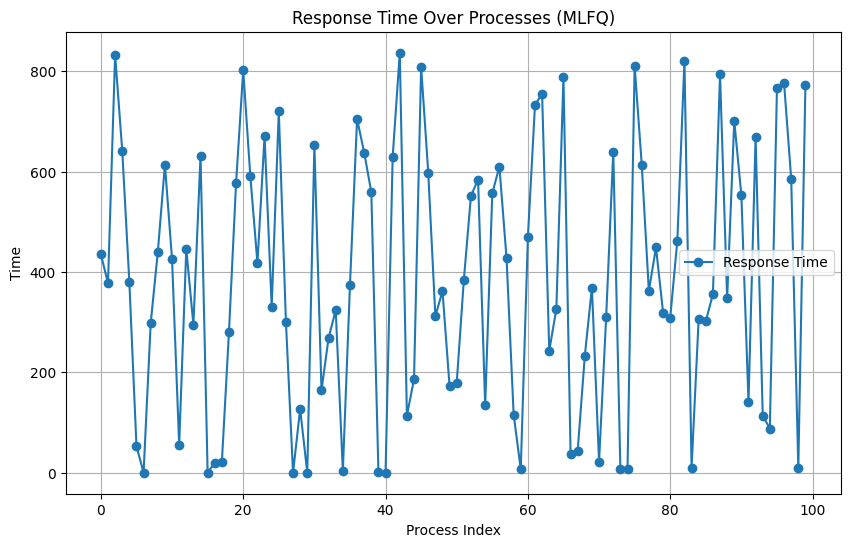

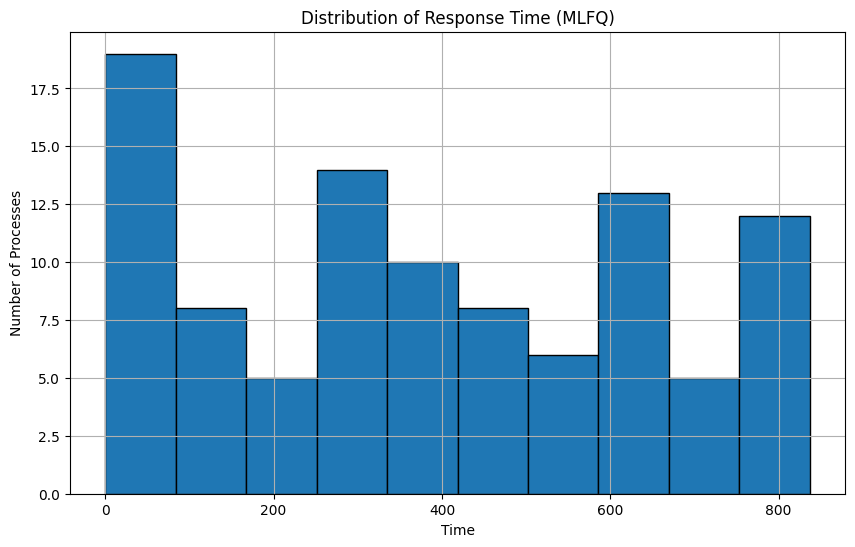

In [185]:
for idx in range(len(metrics_mlfq)):
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlfq_metrics[metrics_mlfq[idx]], marker='o', label=metrics_mlfq[idx])
    plt.title(f'{metrics_mlfq[idx]} Over Processes (MLFQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()

    times = df_mlfq_metrics[metrics_mlfq[idx]]
    plt.figure(figsize=(10, 6))
    plt.hist(times, bins=10, edgecolor='black')
    plt.title(f'Distribution of {metrics_mlfq[idx]} (MLFQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.grid()
    plt.show()

## Comparative Analysis

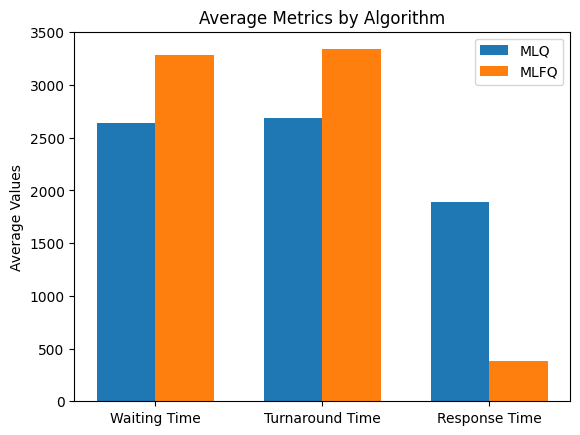

In [186]:
labels = metrics_mlq.tolist()
mlq_means = averages_mlq.values
mlfq_means = averages_mlfq.values
x = np.arange(len(labels))  
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mlq_means, width, label='MLQ')
rects2 = ax.bar(x + width/2, mlfq_means, width, label='MLFQ')
ax.set_ylabel('Average Values')
ax.set_title('Average Metrics by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [187]:
diferences = averages_mlq.values - averages_mlfq.values
print("Diferences between MLQ and MLFQ:")
for label, diff in zip(labels, diferences):
    print(f"{label}: {diff:.2f}")

Diferences between MLQ and MLFQ:
Waiting Time: -652.18
Turnaround Time: -652.18
Response Time: 1502.21


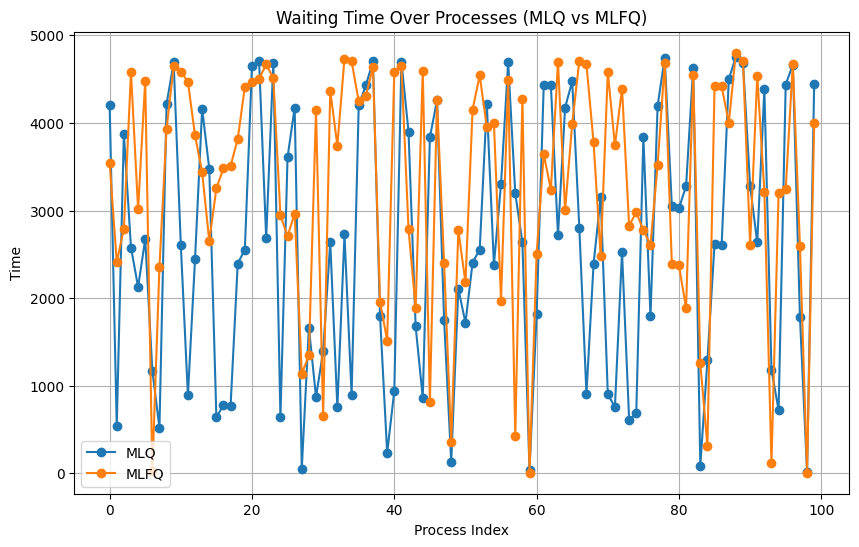

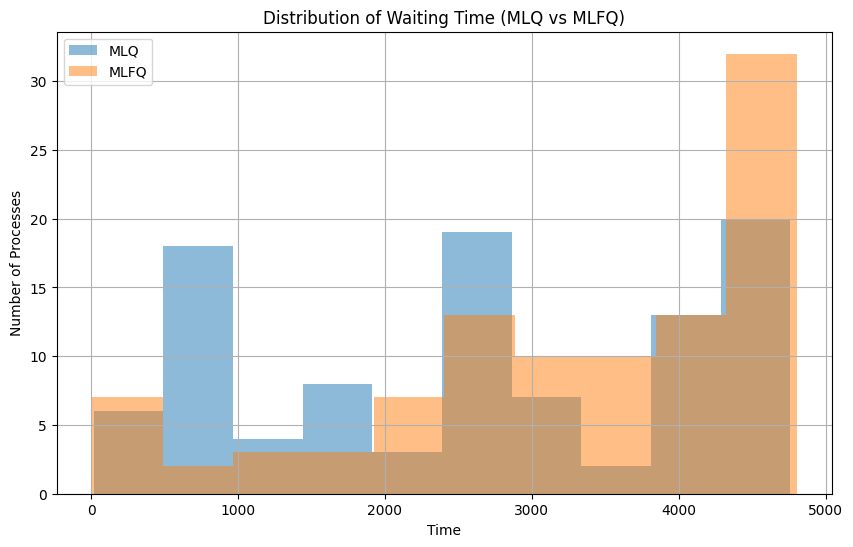

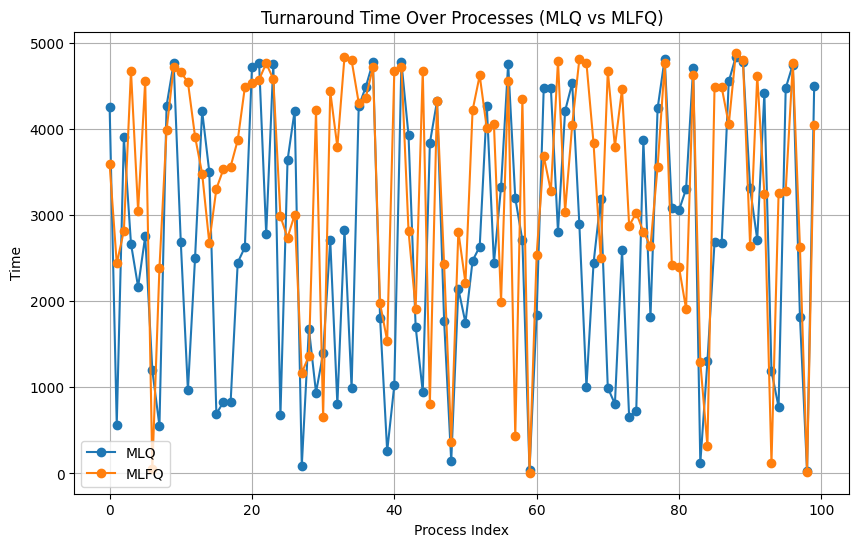

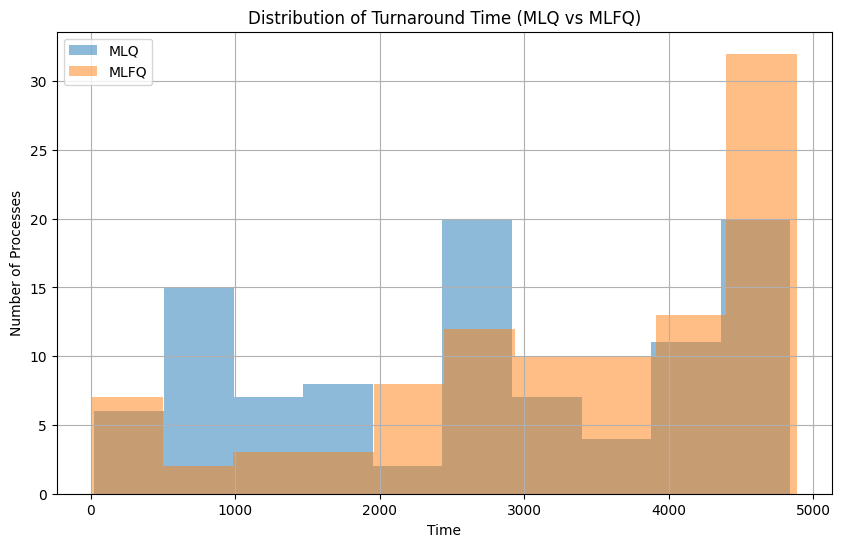

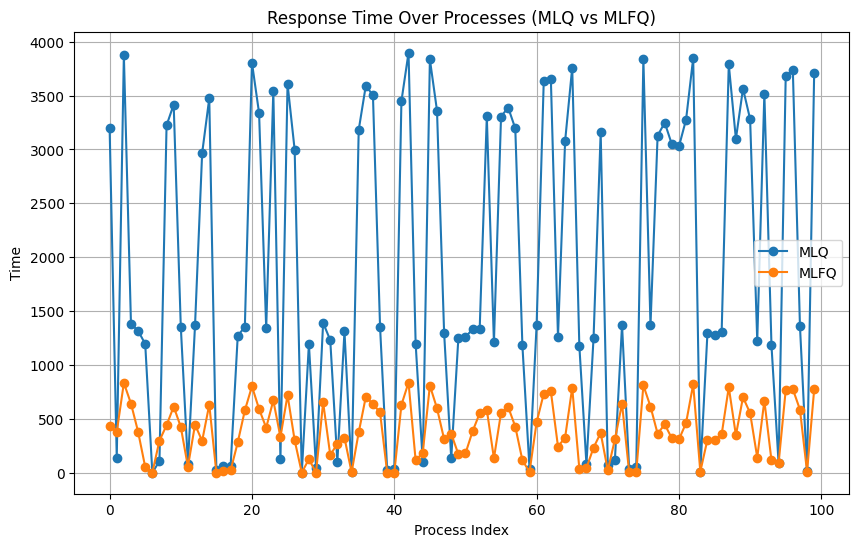

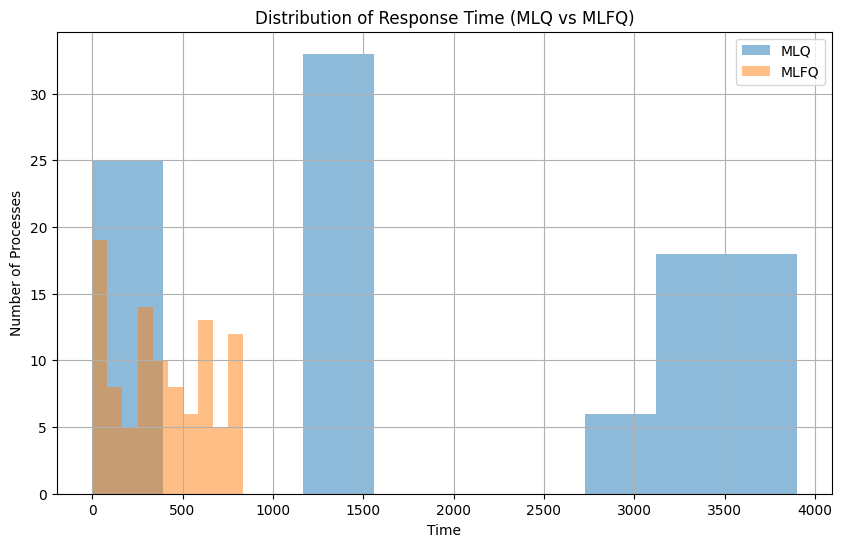

In [188]:
for metric in metrics_mlq:
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlq_metrics[metric], marker='o', label='MLQ')
    plt.plot(df_mlfq_metrics[metric], marker='o', label='MLFQ')
    plt.title(f'{metric} Over Processes (MLQ vs MLFQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.hist(df_mlq_metrics[metric], bins=10, alpha=0.5, label='MLQ')
    plt.hist(df_mlfq_metrics[metric], bins=10, alpha=0.5, label='MLFQ')
    plt.title(f'Distribution of {metric} (MLQ vs MLFQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.legend()
    plt.grid()
    plt.show()

### Short vs long processes

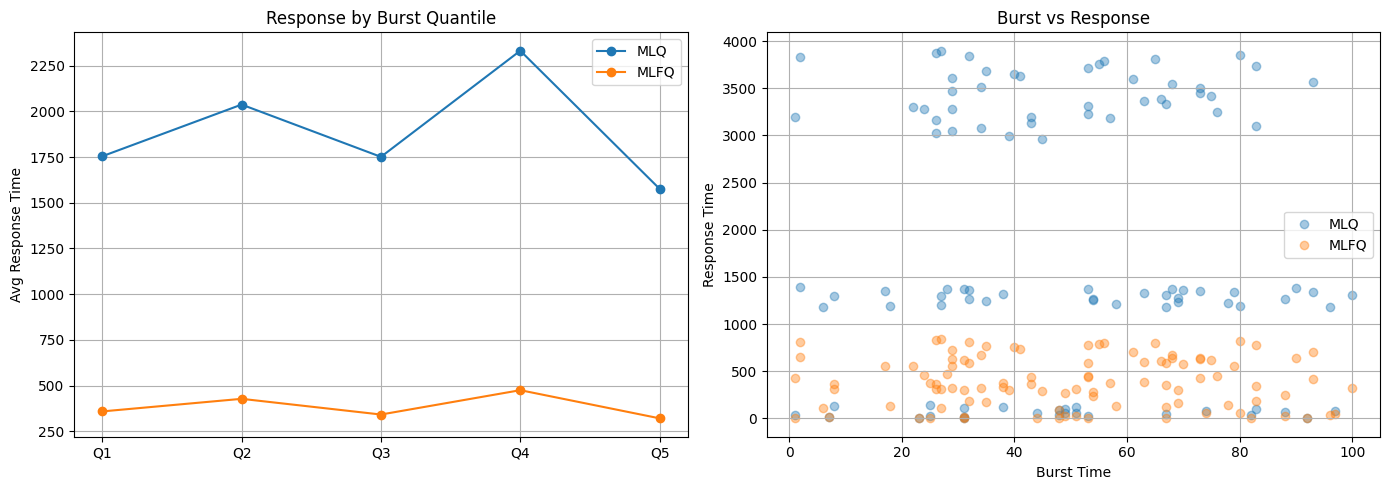

In [189]:
# Q1 shorter processes - Q5 longer processes
bins = pd.qcut(df_mlq_metrics["Burst"], 5)
mlq_group = df_mlq_metrics.groupby(bins)["Response Time"].mean()
mlfq_group = df_mlfq_metrics.groupby(bins)["Response Time"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(mlq_group.values, marker='o', label="MLQ")
axes[0].plot(mlfq_group.values, marker='o', label="MLFQ")
axes[0].set_xticks(range(len(mlq_group)))
axes[0].set_xticklabels([f"Q{i+1}" for i in range(len(mlq_group))])
axes[0].set_ylabel("Avg Response Time")
axes[0].set_title("Response by Burst Quantile")
axes[0].legend()
axes[0].grid()

axes[1].scatter(df_mlq_metrics["Burst"],
                df_mlq_metrics["Response Time"],
                alpha=0.4,
                label="MLQ")
axes[1].scatter(df_mlfq_metrics["Burst"],
                df_mlfq_metrics["Response Time"],
                alpha=0.4,
                label="MLFQ")
axes[1].set_xlabel("Burst Time")
axes[1].set_ylabel("Response Time")
axes[1].set_title("Burst vs Response")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

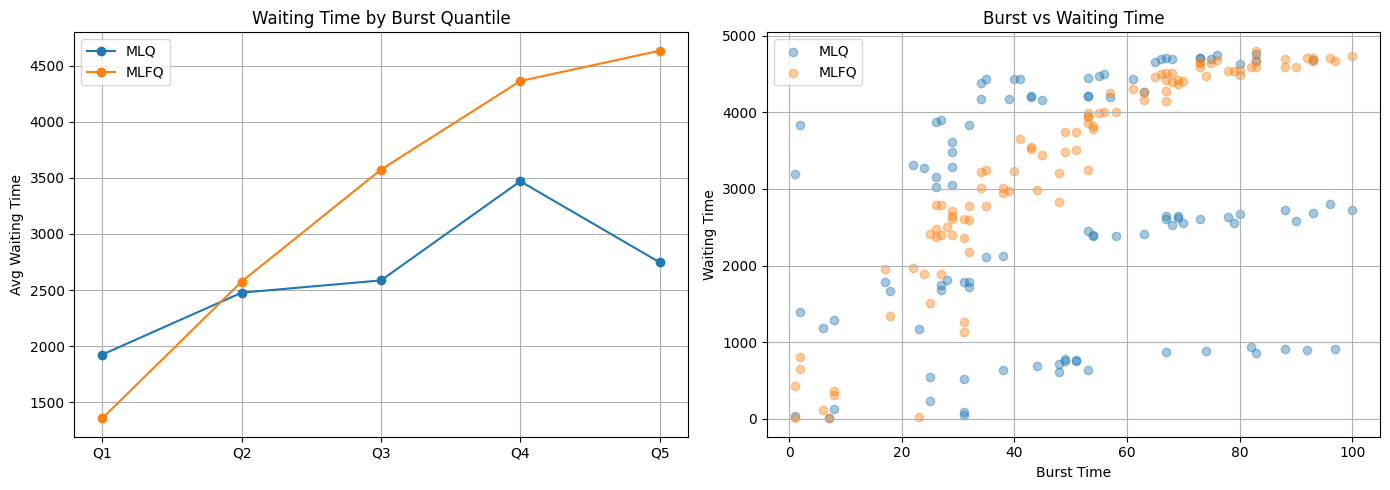

In [190]:
bins = pd.qcut(df_mlq_metrics["Burst"], 5)
mlq_group = df_mlq_metrics.groupby(bins)["Waiting Time"].mean()
mlfq_group = df_mlfq_metrics.groupby(bins)["Waiting Time"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(mlq_group.values, marker='o', label="MLQ")
axes[0].plot(mlfq_group.values, marker='o', label="MLFQ")
axes[0].set_xticks(range(len(mlq_group)))
axes[0].set_xticklabels([f"Q{i+1}" for i in range(len(mlq_group))])
axes[0].set_ylabel("Avg Waiting Time")
axes[0].set_title("Waiting Time by Burst Quantile")
axes[0].legend()
axes[0].grid()

axes[1].scatter(df_mlq_metrics["Burst"],
                df_mlq_metrics["Waiting Time"],
                alpha=0.4,
                label="MLQ")
axes[1].scatter(df_mlfq_metrics["Burst"],
                df_mlfq_metrics["Waiting Time"],
                alpha=0.4,
                label="MLFQ")
axes[1].set_xlabel("Burst Time")
axes[1].set_ylabel("Waiting Time")
axes[1].set_title("Burst vs Waiting Time")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [191]:
# pip freeze > requirements.txt

/var/folders/4h/jkzkdvk50d7gfz05b0hy2p700000gq/T/ipykernel_43055/4268630538.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('hsv', n_processes + 1)


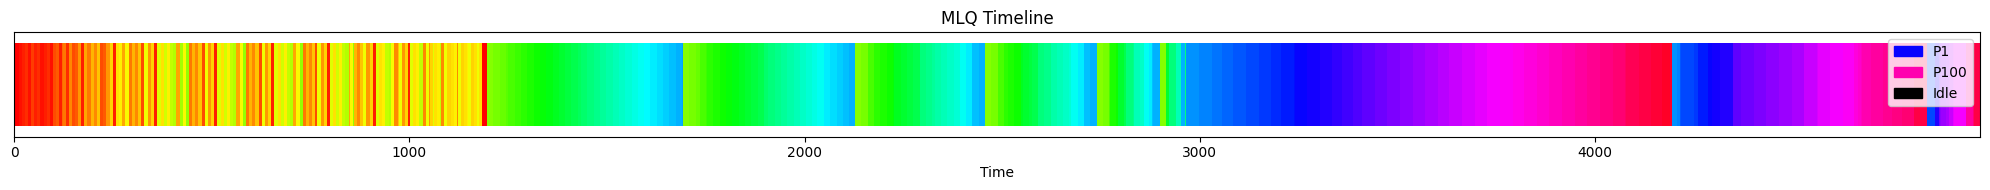

In [192]:
# Timeline Visualization
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# Generate unique colors for all processes
processes = [p for p in df_mlq_timeline['Process'].unique() if p != 'Idle']
n_processes = len(processes)
colors = cm.get_cmap('hsv', n_processes + 1)
process_colors = {proc: colors(i) for i, proc in enumerate(processes)}
process_colors['Idle'] = 'black'

# Create timeline
fig, ax = plt.subplots(figsize=(20, 2))

for i, row in df_mlq_timeline.iterrows():
    proc = row['Process']
    ax.barh(0, 1, left=i, color=process_colors.get(proc, 'white'), 
        edgecolor='none', height=0.8)

ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0, len(df_mlq_timeline))
ax.set_xlabel('Time')
ax.set_yticks([])
ax.set_title('MLQ Timeline')

# Add legend for P1, P100, and Idle
legend_elements = [
    mpatches.Patch(color=process_colors['P1'], label='P1'),
    mpatches.Patch(color=process_colors[f'P{n_processes}'], label=f'P{n_processes}'),
    mpatches.Patch(color='black', label='Idle')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


/var/folders/4h/jkzkdvk50d7gfz05b0hy2p700000gq/T/ipykernel_43055/2858927776.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('hsv', n_processes + 1)


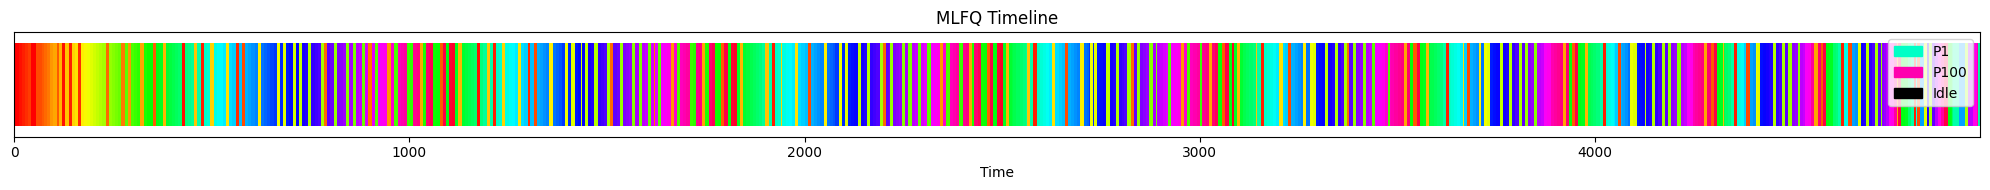

In [193]:
# Timeline Visualization
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# Generate unique colors for all processes
processes = [p for p in df_mlfq_timeline['Process'].unique() if p != 'Idle']
n_processes = len(processes)
colors = cm.get_cmap('hsv', n_processes + 1)
process_colors = {proc: colors(i) for i, proc in enumerate(processes)}
process_colors['Idle'] = 'black'

# Create timeline
fig, ax = plt.subplots(figsize=(20, 2))

for i, row in df_mlfq_timeline.iterrows():
    proc = row['Process']
    ax.barh(0, 1, left=i, color=process_colors.get(proc, 'white'), 
        edgecolor='none', height=0.8)

ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0, len(df_mlfq_timeline))
ax.set_xlabel('Time')
ax.set_yticks([])
ax.set_title('MLFQ Timeline')

# Add legend for P1, P100, and Idle
legend_elements = [
    mpatches.Patch(color=process_colors['P1'], label='P1'),
    mpatches.Patch(color=process_colors[f'P{n_processes}'], label=f'P{n_processes}'),
    mpatches.Patch(color='black', label='Idle')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

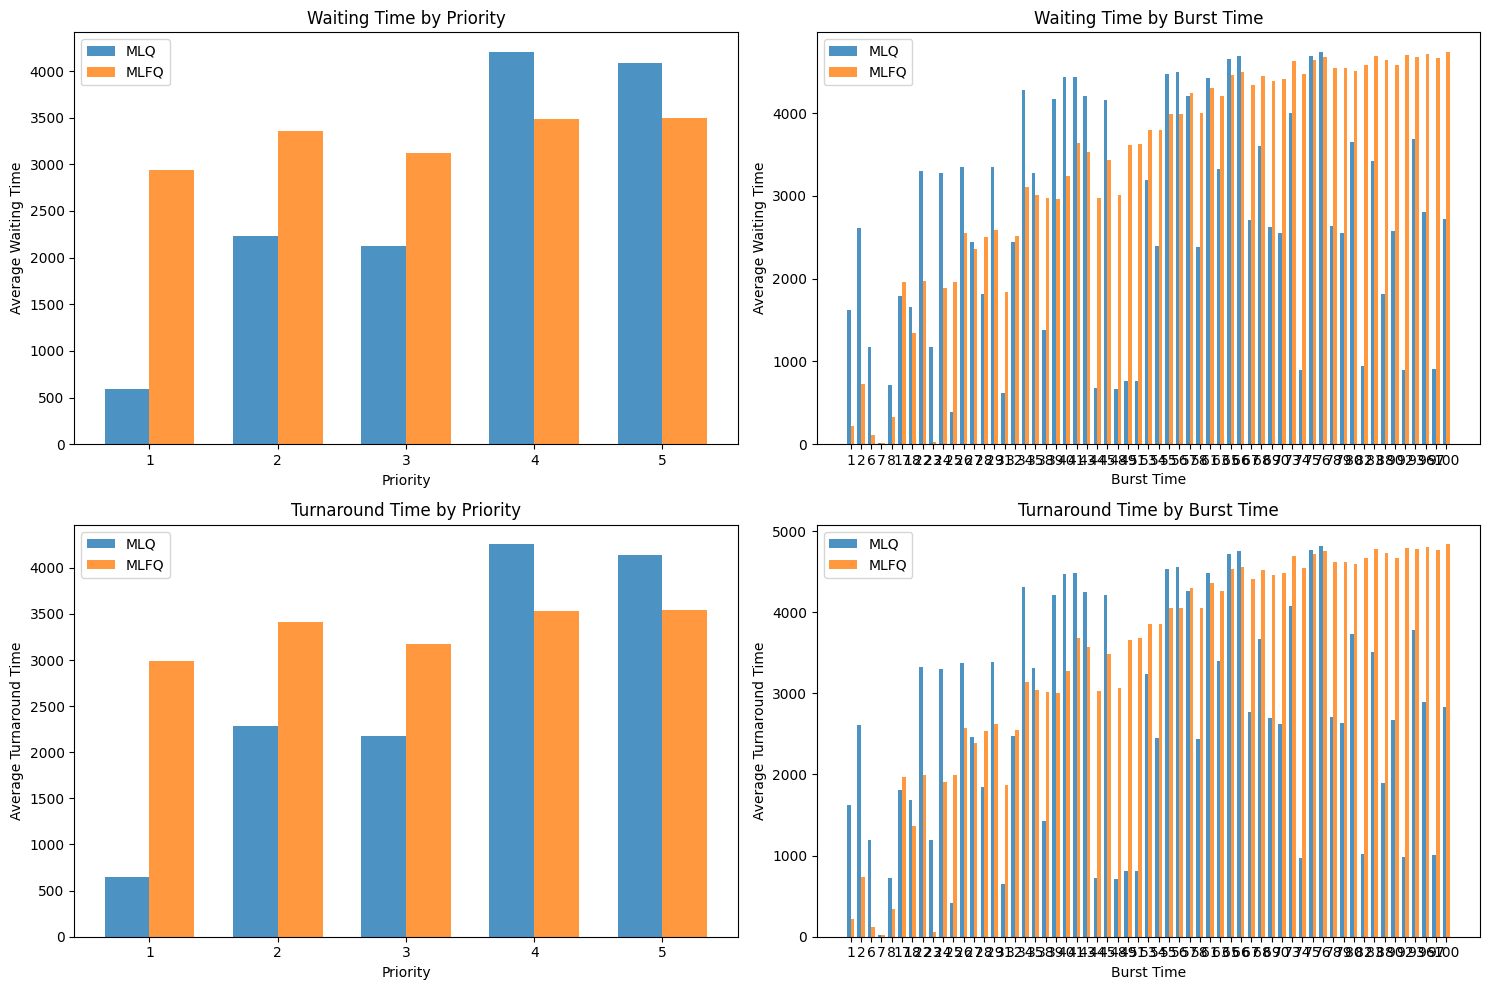

In [194]:
# Load MLFQ data
df_mlfq_metrics = pd.read_csv("mlfq_metrics.csv")

# Waiting Time by Priority
priority_wait_mlq = df_mlq_metrics.groupby('Priority')['Waiting Time'].mean()
priority_wait_mlfq = df_mlfq_metrics.groupby('Priority')['Waiting Time'].mean()

# Waiting Time by Burst Time
burst_wait_mlq = df_mlq_metrics.groupby('Burst')['Waiting Time'].mean()
burst_wait_mlfq = df_mlfq_metrics.groupby('Burst')['Waiting Time'].mean()

# Turnaround Time by Priority
priority_turn_mlq = df_mlq_metrics.groupby('Priority')['Turnaround Time'].mean()
priority_turn_mlfq = df_mlfq_metrics.groupby('Priority')['Turnaround Time'].mean()

# Turnaround Time by Burst Time
burst_turn_mlq = df_mlq_metrics.groupby('Burst')['Turnaround Time'].mean()
burst_turn_mlfq = df_mlfq_metrics.groupby('Burst')['Turnaround Time'].mean()

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
width = 0.35

# Chart 1: Waiting Time by Priority
x = range(len(priority_wait_mlq))
ax1.bar([i - width/2 for i in x], priority_wait_mlq, width, label='MLQ', alpha=0.8)
ax1.bar([i + width/2 for i in x], priority_wait_mlfq, width, label='MLFQ', alpha=0.8)
ax1.set_xlabel('Priority')
ax1.set_ylabel('Average Waiting Time')
ax1.set_title('Waiting Time by Priority')
ax1.set_xticks(x)
ax1.set_xticklabels(priority_wait_mlq.index)
ax1.legend()

# Chart 2: Waiting Time by Burst Time
x = range(len(burst_wait_mlq))
ax2.bar([i - width/2 for i in x], burst_wait_mlq, width, label='MLQ', alpha=0.8)
ax2.bar([i + width/2 for i in x], burst_wait_mlfq, width, label='MLFQ', alpha=0.8)
ax2.set_xlabel('Burst Time')
ax2.set_ylabel('Average Waiting Time')
ax2.set_title('Waiting Time by Burst Time')
ax2.set_xticks(x)
ax2.set_xticklabels(burst_wait_mlq.index)
ax2.legend()

# Chart 3: Turnaround Time by Priority
x = range(len(priority_turn_mlq))
ax3.bar([i - width/2 for i in x], priority_turn_mlq, width, label='MLQ', alpha=0.8)
ax3.bar([i + width/2 for i in x], priority_turn_mlfq, width, label='MLFQ', alpha=0.8)
ax3.set_xlabel('Priority')
ax3.set_ylabel('Average Turnaround Time')
ax3.set_title('Turnaround Time by Priority')
ax3.set_xticks(x)
ax3.set_xticklabels(priority_turn_mlq.index)
ax3.legend()

# Chart 4: Turnaround Time by Burst Time
x = range(len(burst_turn_mlq))
ax4.bar([i - width/2 for i in x], burst_turn_mlq, width, label='MLQ', alpha=0.8)
ax4.bar([i + width/2 for i in x], burst_turn_mlfq, width, label='MLFQ', alpha=0.8)
ax4.set_xlabel('Burst Time')
ax4.set_ylabel('Average Turnaround Time')
ax4.set_title('Turnaround Time by Burst Time')
ax4.set_xticks(x)
ax4.set_xticklabels(burst_turn_mlq.index)
ax4.legend()

plt.tight_layout()
plt.show()



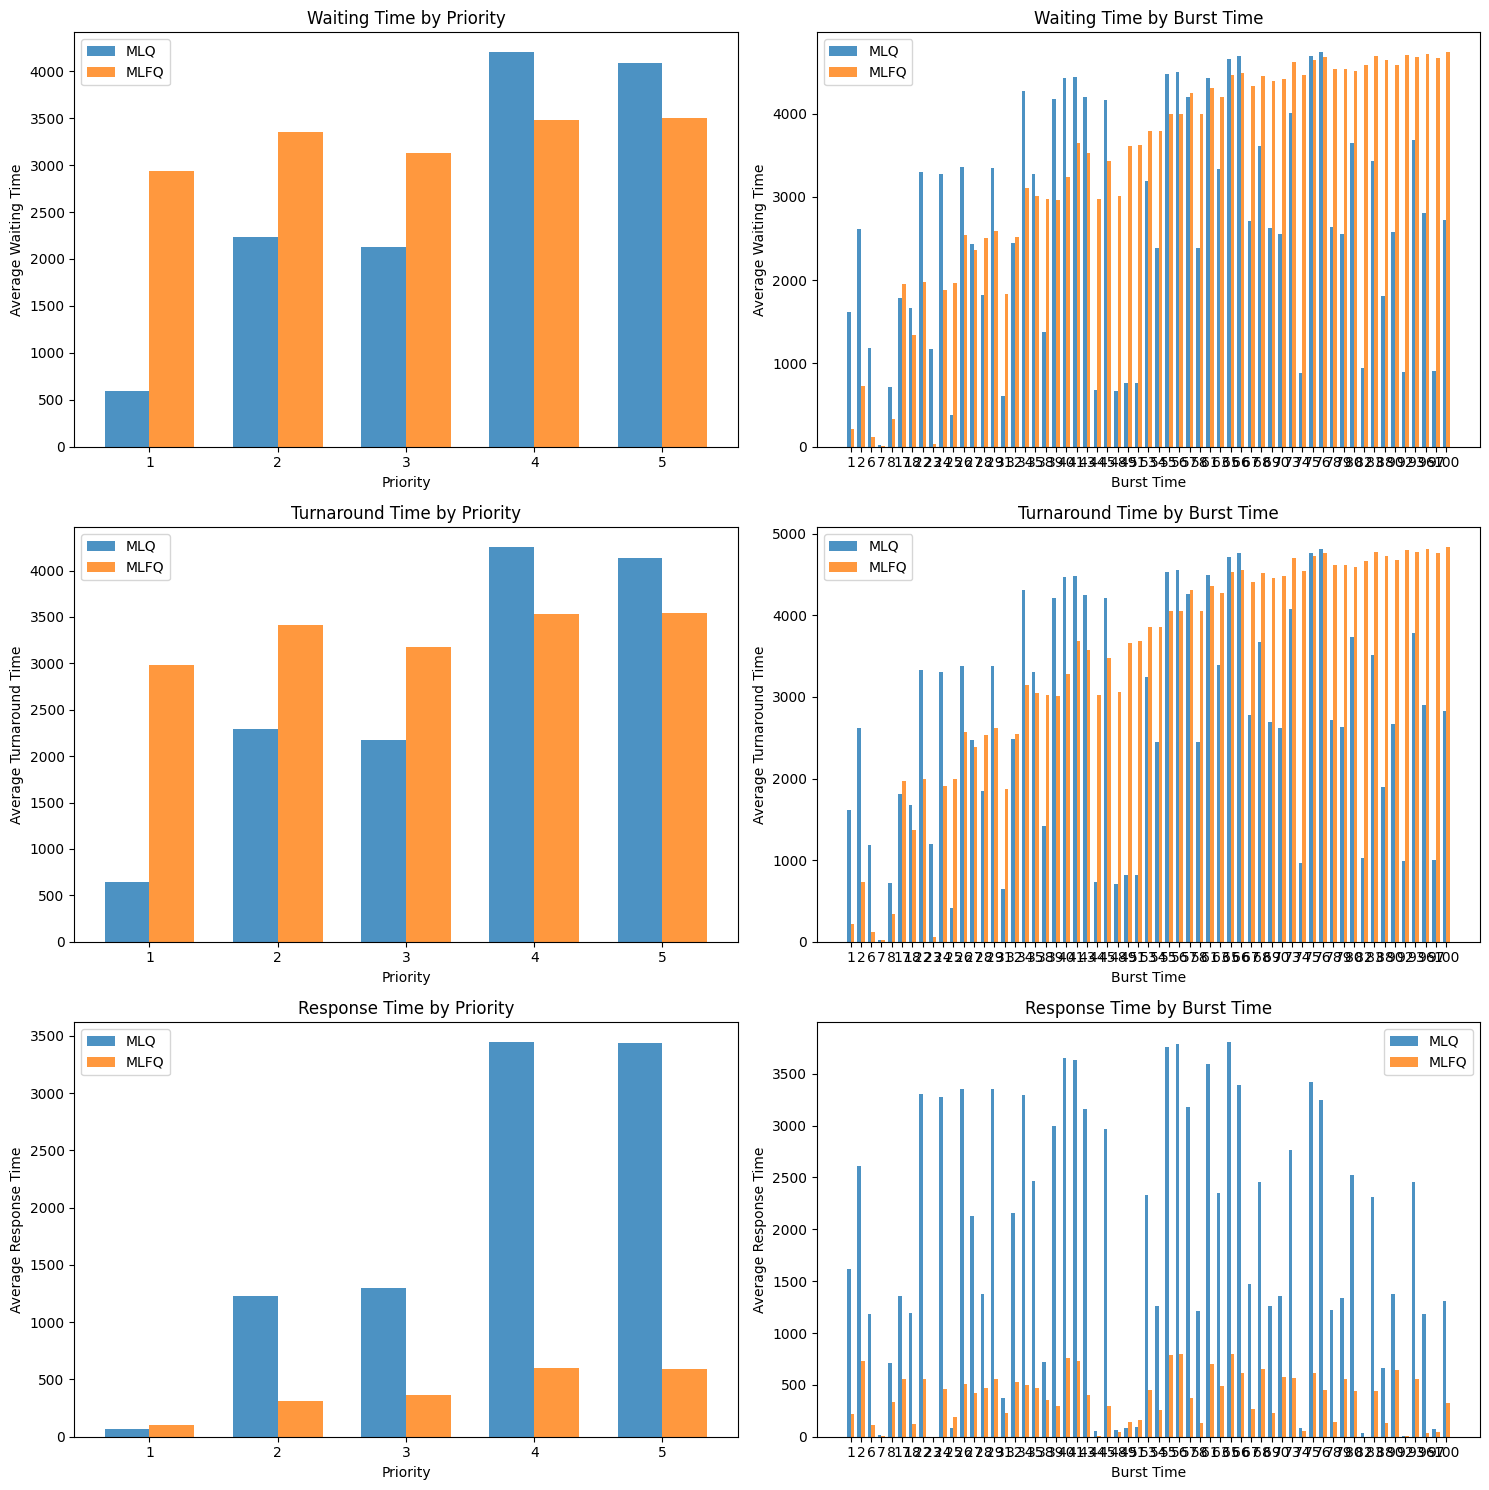

In [195]:
# Response Time by Priority
priority_resp_mlq = df_mlq_metrics.groupby('Priority')['Response Time'].mean()
priority_resp_mlfq = df_mlfq_metrics.groupby('Priority')['Response Time'].mean()

# Response Time by Burst Time
burst_resp_mlq = df_mlq_metrics.groupby('Burst')['Response Time'].mean()
burst_resp_mlfq = df_mlfq_metrics.groupby('Burst')['Response Time'].mean()

# Plot (ahora con 6 gráficas)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
width = 0.35



# Chart 1: Waiting Time by Priority
x = range(len(priority_wait_mlq))
ax1.bar([i - width/2 for i in x], priority_wait_mlq, width, label='MLQ', alpha=0.8)
ax1.bar([i + width/2 for i in x], priority_wait_mlfq, width, label='MLFQ', alpha=0.8)
ax1.set_xlabel('Priority')
ax1.set_ylabel('Average Waiting Time')
ax1.set_title('Waiting Time by Priority')
ax1.set_xticks(x)
ax1.set_xticklabels(priority_wait_mlq.index)
ax1.legend()

# Chart 2: Waiting Time by Burst Time
x = range(len(burst_wait_mlq))
ax2.bar([i - width/2 for i in x], burst_wait_mlq, width, label='MLQ', alpha=0.8)
ax2.bar([i + width/2 for i in x], burst_wait_mlfq, width, label='MLFQ', alpha=0.8)
ax2.set_xlabel('Burst Time')
ax2.set_ylabel('Average Waiting Time')
ax2.set_title('Waiting Time by Burst Time')
ax2.set_xticks(x)
ax2.set_xticklabels(burst_wait_mlq.index)
ax2.legend()

# Chart 3: Turnaround Time by Priority
x = range(len(priority_turn_mlq))
ax3.bar([i - width/2 for i in x], priority_turn_mlq, width, label='MLQ', alpha=0.8)
ax3.bar([i + width/2 for i in x], priority_turn_mlfq, width, label='MLFQ', alpha=0.8)
ax3.set_xlabel('Priority')
ax3.set_ylabel('Average Turnaround Time')
ax3.set_title('Turnaround Time by Priority')
ax3.set_xticks(x)
ax3.set_xticklabels(priority_turn_mlq.index)
ax3.legend()

# Chart 4: Turnaround Time by Burst Time
x = range(len(burst_turn_mlq))
ax4.bar([i - width/2 for i in x], burst_turn_mlq, width, label='MLQ', alpha=0.8)
ax4.bar([i + width/2 for i in x], burst_turn_mlfq, width, label='MLFQ', alpha=0.8)
ax4.set_xlabel('Burst Time')
ax4.set_ylabel('Average Turnaround Time')
ax4.set_title('Turnaround Time by Burst Time')
ax4.set_xticks(x)
ax4.set_xticklabels(burst_turn_mlq.index)
ax4.legend()
# Chart 5: Response Time by Priority
x = range(len(priority_resp_mlq))
ax5.bar([i - width/2 for i in x], priority_resp_mlq, width, label='MLQ', alpha=0.8)
ax5.bar([i + width/2 for i in x], priority_resp_mlfq, width, label='MLFQ', alpha=0.8)
ax5.set_xlabel('Priority')
ax5.set_ylabel('Average Response Time')
ax5.set_title('Response Time by Priority')
ax5.set_xticks(x)
ax5.set_xticklabels(priority_resp_mlq.index)
ax5.legend()

# Chart 6: Response Time by Burst Time
x = range(len(burst_resp_mlq))
ax6.bar([i - width/2 for i in x], burst_resp_mlq, width, label='MLQ', alpha=0.8)
ax6.bar([i + width/2 for i in x], burst_resp_mlfq, width, label='MLFQ', alpha=0.8)
ax6.set_xlabel('Burst Time')
ax6.set_ylabel('Average Response Time')
ax6.set_title('Response Time by Burst Time')
ax6.set_xticks(x)
ax6.set_xticklabels(burst_resp_mlq.index)
ax6.legend()

plt.tight_layout()
plt.show()


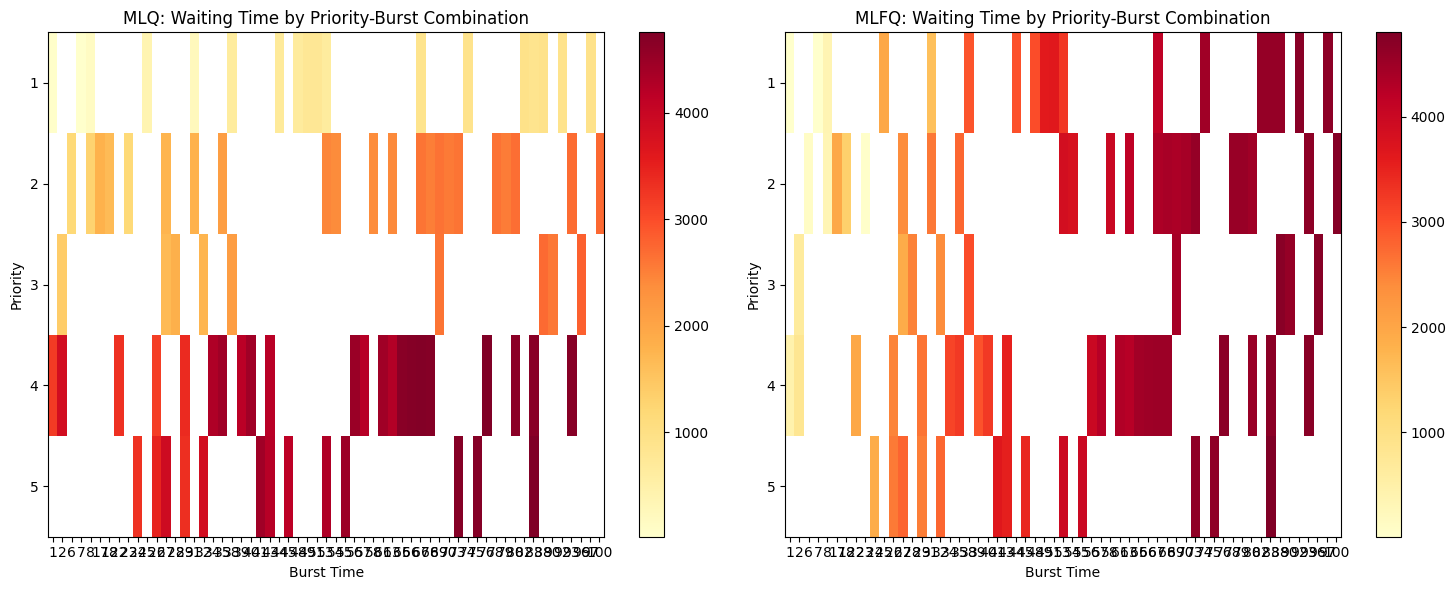

In [196]:
# Heatmap: Waiting Time by Priority-Burst combinations
combo_mlq = df_mlq_metrics.groupby(['Priority', 'Burst'])['Waiting Time'].mean().unstack()
combo_mlfq = df_mlfq_metrics.groupby(['Priority', 'Burst'])['Waiting Time'].mean().unstack()

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MLQ Heatmap
im1 = ax1.imshow(combo_mlq, cmap='YlOrRd', aspect='auto')
ax1.set_xlabel('Burst Time')
ax1.set_ylabel('Priority')
ax1.set_title('MLQ: Waiting Time by Priority-Burst Combination')
ax1.set_xticks(range(len(combo_mlq.columns)))
ax1.set_xticklabels(combo_mlq.columns)
ax1.set_yticks(range(len(combo_mlq.index)))
ax1.set_yticklabels(combo_mlq.index)
plt.colorbar(im1, ax=ax1)

# MLFQ Heatmap
im2 = ax2.imshow(combo_mlfq, cmap='YlOrRd', aspect='auto')
ax2.set_xlabel('Burst Time')
ax2.set_ylabel('Priority')
ax2.set_title('MLFQ: Waiting Time by Priority-Burst Combination')
ax2.set_xticks(range(len(combo_mlfq.columns)))
ax2.set_xticklabels(combo_mlfq.columns)
ax2.set_yticks(range(len(combo_mlfq.index)))
ax2.set_yticklabels(combo_mlfq.index)
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()
